In [120]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [121]:
column = ['carid','tradetime','brand','serial','model','mileage','color','cityid','carcode','transfercount','seatings','registerdate','licensedate','country','maketype','modelyear','displacement','gearbox','oiltype','newprice','anony1','anony2','anony3','anony4','anony5','anony6','anony7','anony8','anony9','anony10','anony11','anony12','anony13','anony14','price']
df =  pd.read_excel("次次洗数据集.xlsx")
del df['Unnamed: 0']

In [122]:
print(df.shape)
df

(29243, 35)


,carid,tradetime,brand,serial,model,mileage,color,cityid,carcode,transfercount,...,anony6,anony7,anony8,anony9,anony10,anony11,anony12,anony13,anony14,price
0,1,7843,1,1,1,4.01,1,1,1,0,...,1,5866.20448,1.0,5.0,2.0,0.0,11.932050,6445.0,1,4.24
1,2,7840,2,2,2,8.60,1,2,1,0,...,2,5984.50712,2.0,4.0,3.0,1.0,12.163010,6080.0,2,7.38
2,5,7834,5,5,5,15.56,1,2,3,0,...,2,5740.00000,NaN,NaN,NaN,NaN,11.254202,3040.0,2,1.00
3,6,7844,6,6,6,6.04,1,3,1,3,...,1,6798.00000,2.0,5.0,2.0,0.0,14.087871,6050.0,2,4.38
4,7,7845,7,7,7,5.70,4,1,2,2,...,1,7560.00000,1.0,5.0,2.0,0.0,12.355994,4470.0,1,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29238,74140,7656,11,186,12734,3.12,1,7,1,0,...,2,6231.30200,2.0,4.0,2.0,1.0,11.355487,6475.0,1,14.30
29239,74144,7840,11,186,12734,6.23,1,1,1,1,...,2,7837.00000,2.0,4.0,2.0,1.0,11.355487,6475.0,1,12.80
29240,74147,7496,11,186,12734,3.57,3,1,1,0,...,2,6254.51992,2.0,4.0,2.0,1.0,11.355487,6475.0,1,14.98
29241,74148,7828,11,186,12734,3.62,1,3,1,2,...,2,7764.00000,2.0,4.0,2.0,1.0,11.355487,6475.0,1,15.80


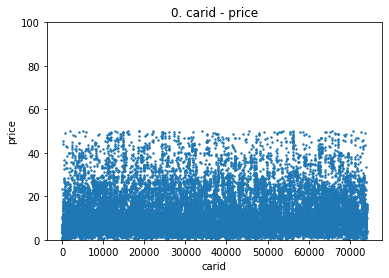

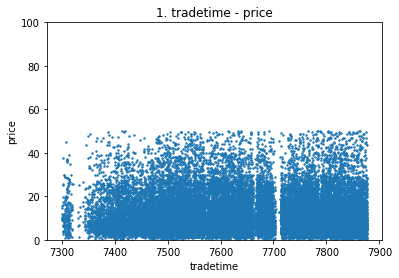

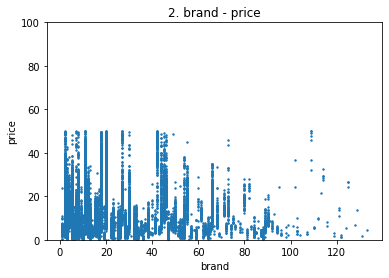

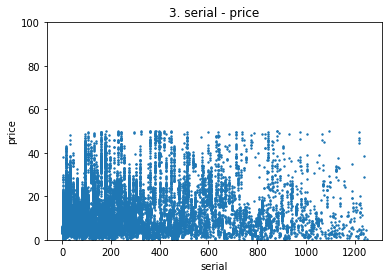

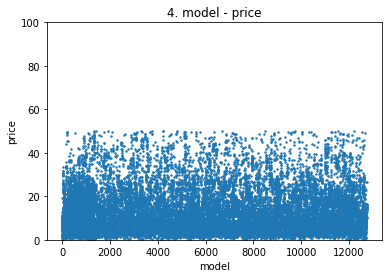

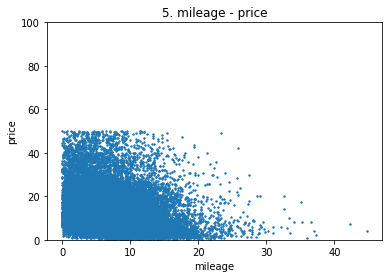

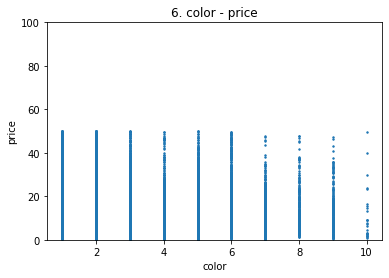

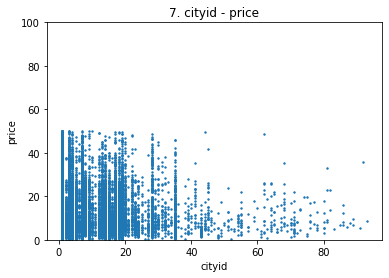

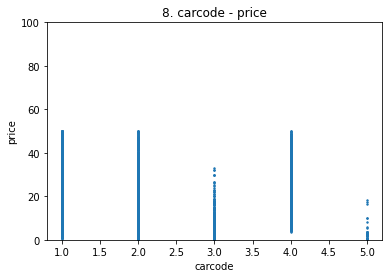

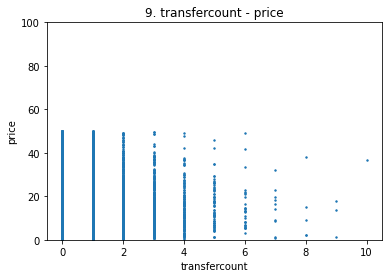

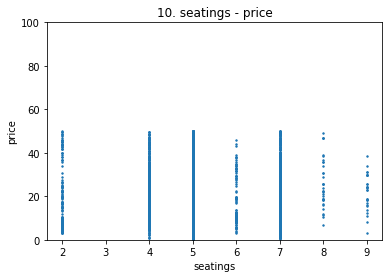

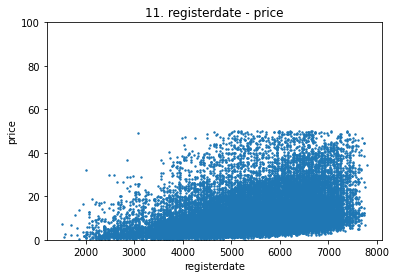

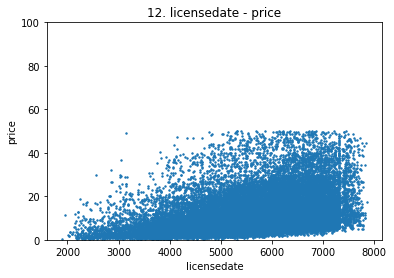

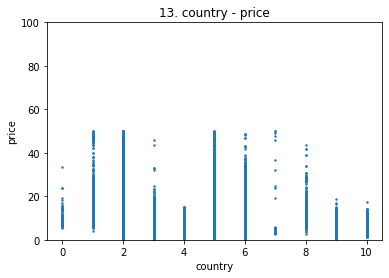

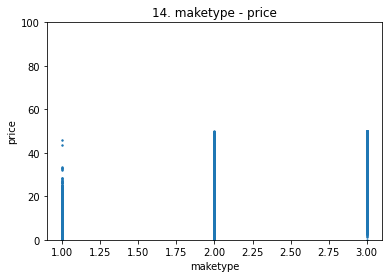

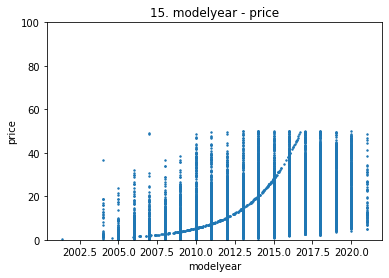

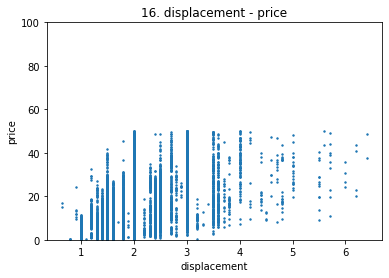

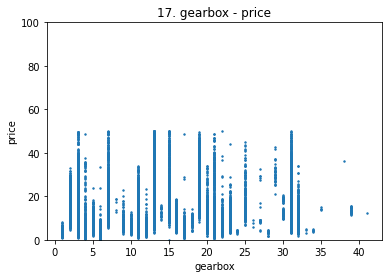

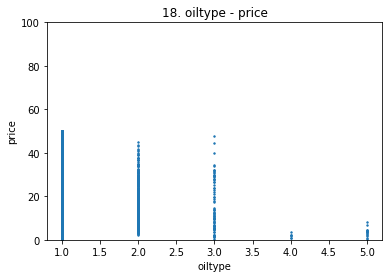

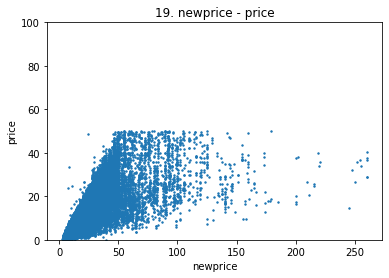

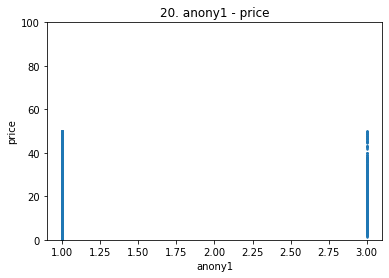

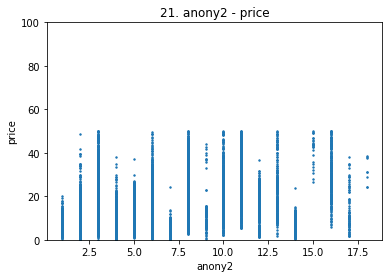

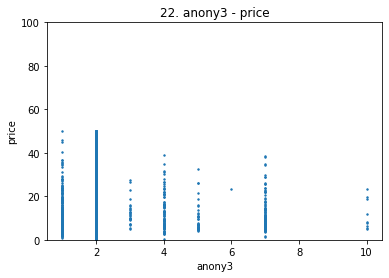

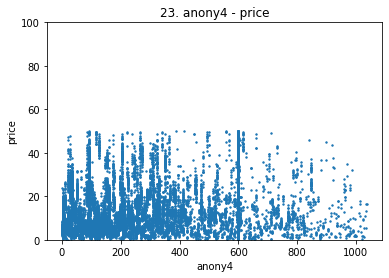

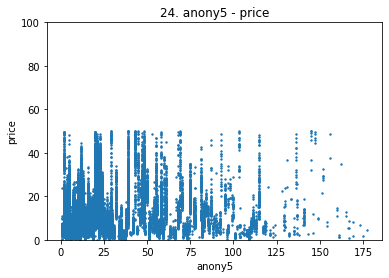

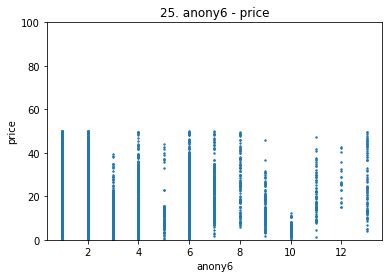

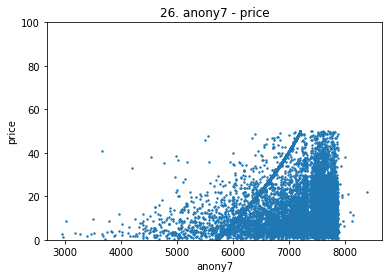

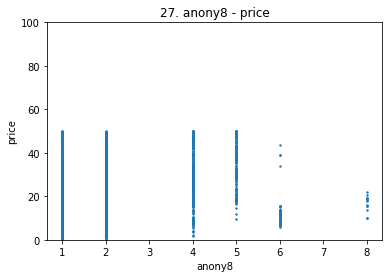

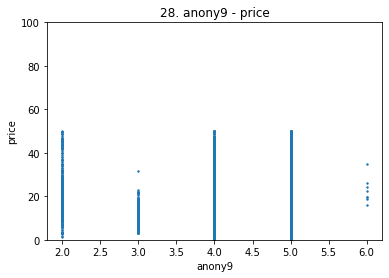

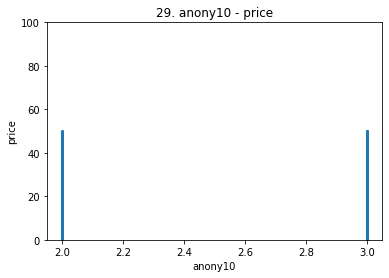

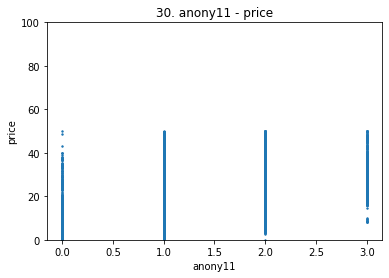

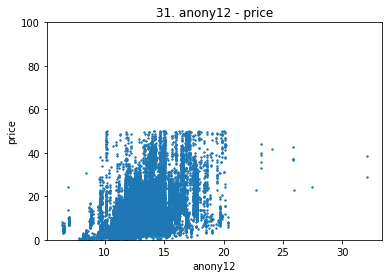

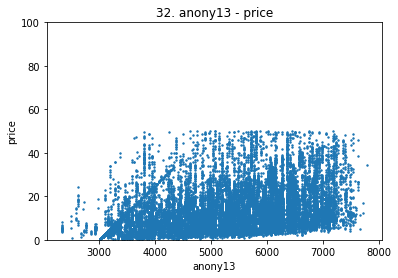

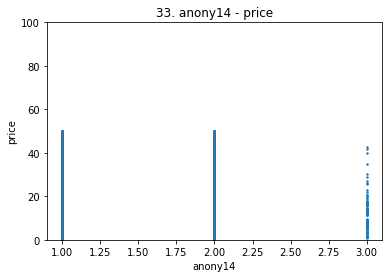

In [123]:
for i in range(34):
    plt.scatter(df[column[i]],df[column[-1]],s=2)
    plt.xlabel(column[i])
    plt.ylabel(column[-1])
    plt.ylim(0,100)
    plt.title(str(i) + '. ' + column[i]+' - '+column[-1])
    plt.show()

# 数据归一化和one-hot编码

In [124]:
# 连续变量，归一化：
continuation = ['brand', 'cityid',  'tradetime', 'serial', 'model', 'mileage', 'registerdate', 'licensedate', 'modelyear', 'displacement', 'gearbox', 'newprice', 'anony4','anony5','anony7','anony12','anony13']
print(len(continuation))
# 离散变量，转one-hot编码：
scatter = ['color', 'carcode', 'transfercount', 'seatings', 'country', 'maketype', 'oiltype', 'anony1', 'anony2','anony3','anony6','anony8','anony9','anony10','anony11','anony14']
scatter_num = [10, 5, 9, 8, 11, 3, 5, 2, 18, 11, 16, 8, 5, 3, 6, 3]
print(sum(scatter_num))

17
123


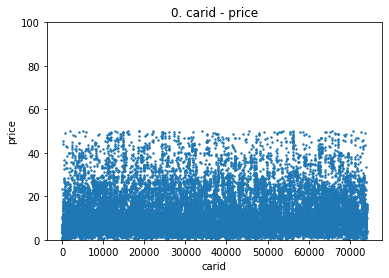

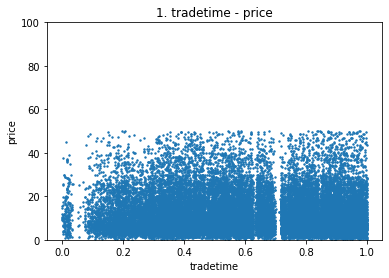

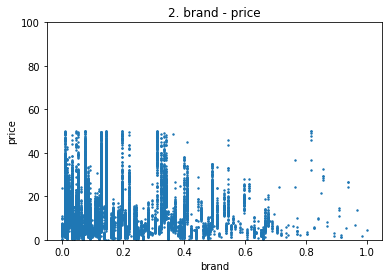

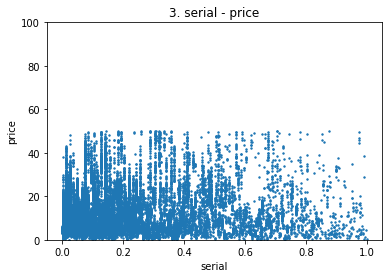

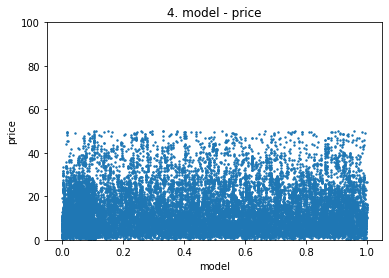

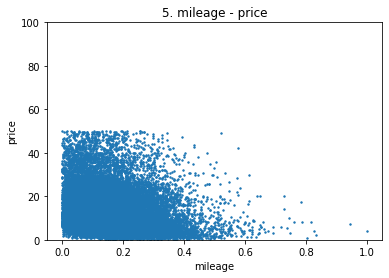

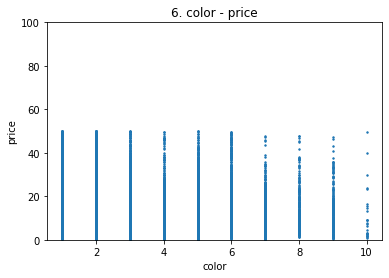

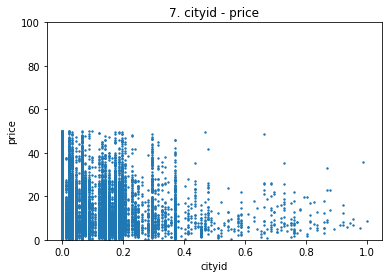

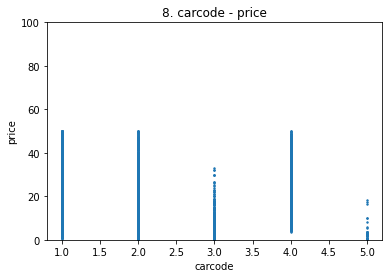

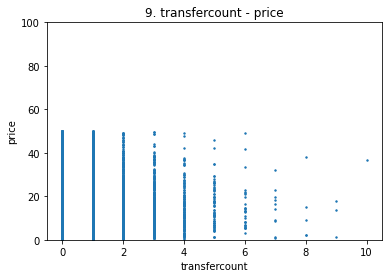

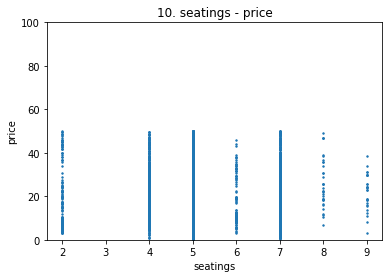

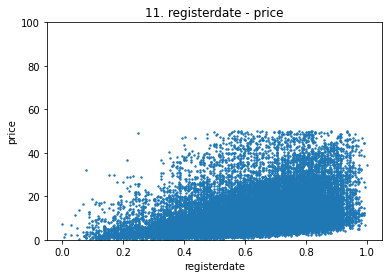

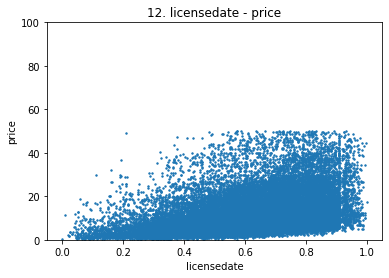

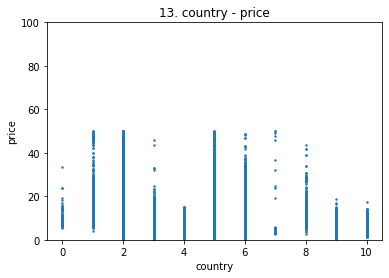

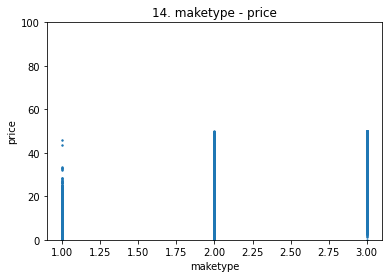

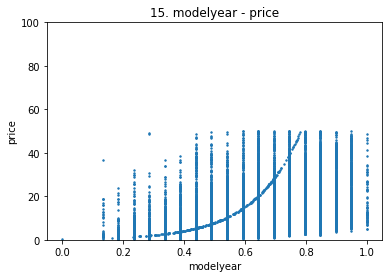

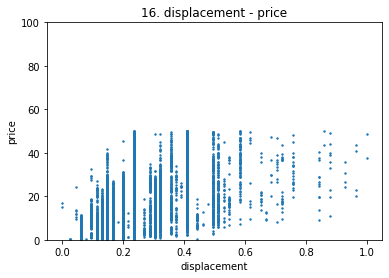

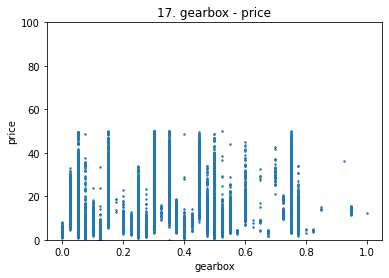

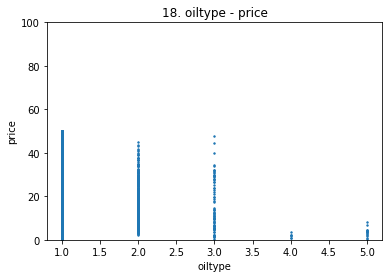

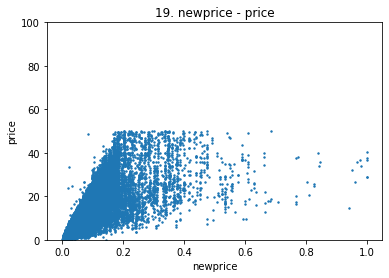

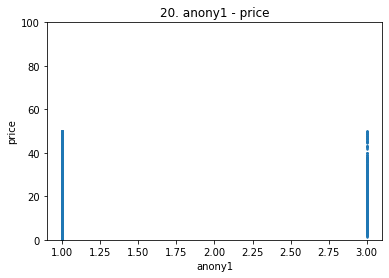

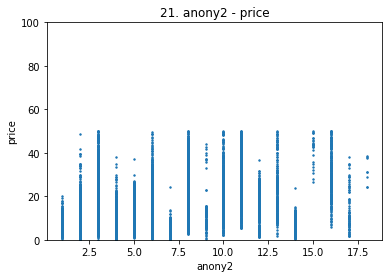

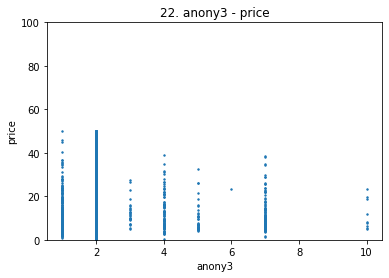

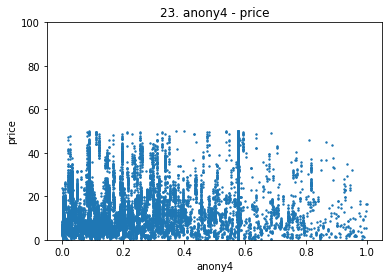

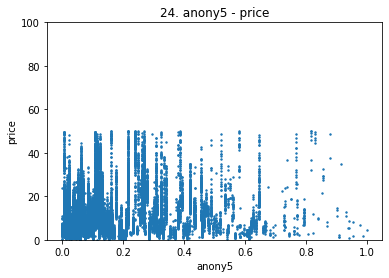

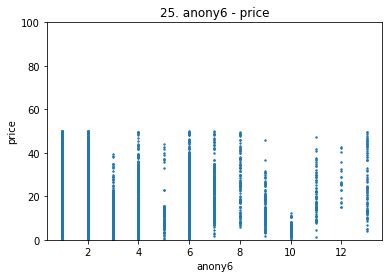

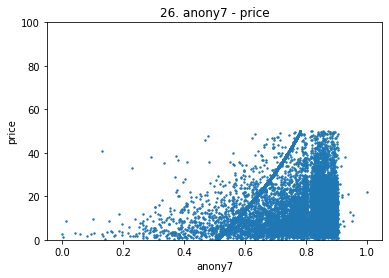

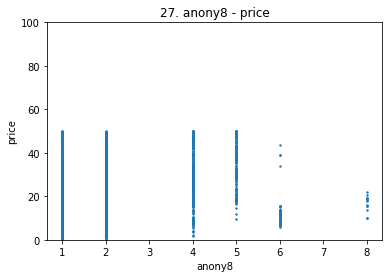

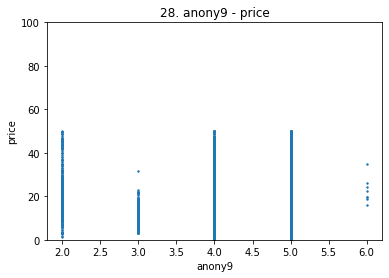

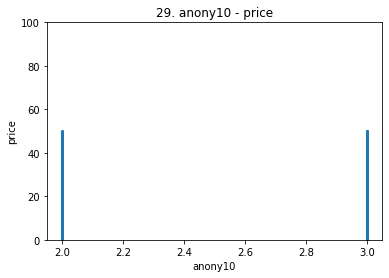

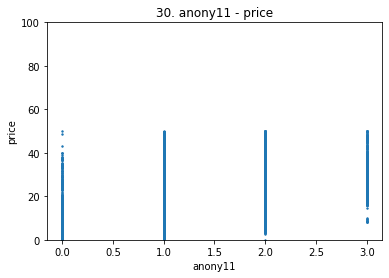

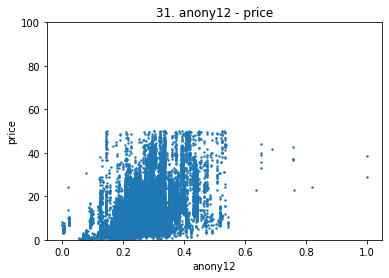

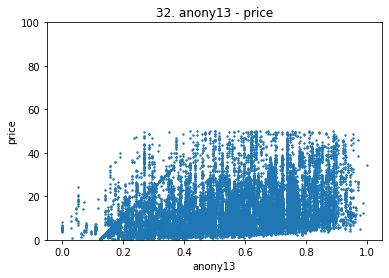

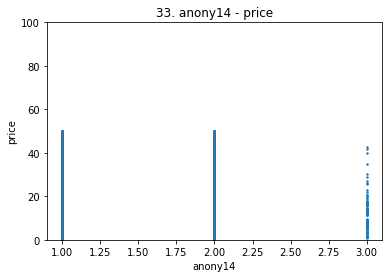

In [125]:
# 归一化
def norm(cls):
    '''
    实现对列z-score归一化
    '''
    df[cls] = df[cls].apply(lambda x: (x - df[cls].min())/(df[cls].max() - df[cls].min()))
    return cls + '类归一化完成'

for cls in continuation:
    norm(cls)

for i in range(34):
    plt.scatter(df[column[i]],df[column[-1]],s=2)
    plt.xlabel(column[i])
    plt.ylabel(column[-1])
    plt.ylim(0,100)
    plt.title(str(i) + '. ' + column[i]+' - '+column[-1])
    plt.show()

In [126]:
# 转one-hot:由于类别各异 对每个分类进行指定

#color 值为1-10，删除onehot第一列
color = np.array(df['color'])
color = color.reshape([len(color),1])
# color 转one-hot
color_onehot = np.eye(11)[color]
color_onehot = color_onehot.reshape(len(color),11)
color_onehot = np.delete(color_onehot,0 ,axis = 1)
color_onehot.shape

(29243, 10)

In [127]:
# carcode 值为1-5，删除第一列
carcode = np.array(df['carcode'])
carcode_onehot = np.eye(6)[carcode]
carcode_onehot = np.delete(carcode_onehot,0 ,axis = 1)
carcode_onehot.shape

(29243, 5)

In [128]:
# transfercount 值为0-10 删除9和10 即为0-8
transfercount = np.array(df['transfercount'])

# transfercount 转one-hot并删除最后两列
transfercount_onehot = np.eye(11)[transfercount]
transfercount_onehot = np.delete(transfercount_onehot,-1,axis = 1)
transfercount_onehot = np.delete(transfercount_onehot,-1,axis = 1)
transfercount_onehot.shape

(29243, 9)

In [129]:
# seatings值为2-9 删除one-hot前两列
seatings = np.array(df['seatings'])
seatings_onehot = np.eye(10)[seatings]
seatings_onehot = np.delete(seatings_onehot,0 ,axis = 1)
seatings_onehot = np.delete(seatings_onehot,0 ,axis = 1)
seatings_onehot.shape

(29243, 8)

In [130]:
# country值为0-10 
country = np.array(df['country'])
for i in range(len(country)):
    if np.isnan(country[i])== True:
        country[i] = 11
country_onehot = np.eye(12)[country.astype(int)]
country_onehot = np.delete(country_onehot,-1 ,axis = 1)
country_onehot.shape

(29243, 11)

In [131]:
# maketype值为1-3 删除one-hot 1列
maketype = np.array(df['maketype'])
maketype_onehot = np.eye(4)[maketype]
maketype_onehot = np.delete(maketype_onehot,0 ,axis = 1)
maketype_onehot.shape

(29243, 3)

In [132]:
# oiltype值为1-5 删除one-hot 1列
oiltype = np.array(df['oiltype'])
oiltype_onehot = np.eye(6)[oiltype]
oiltype_onehot = np.delete(oiltype_onehot,0 ,axis = 1)
oiltype_onehot.shape

(29243, 5)

In [133]:
# anony1值为1、3 删除one-hot 0 -2列
anony1 = np.array(df['anony1'])
anony1_onehot = np.eye(4)[anony1]
anony1_onehot = np.delete(anony1_onehot,0 ,axis = 1)
anony1_onehot = np.delete(anony1_onehot,-2 ,axis = 1)
anony1_onehot.shape

(29243, 2)

In [134]:
# anony2值为1-18 删除one-hot 0 列
anony2 = np.array(df['anony2'])
anony2_onehot = np.eye(19)[anony2]
anony2_onehot = np.delete(anony2_onehot,0 ,axis = 1)
anony2_onehot.shape

(29243, 18)

In [135]:
# anony3值为1-11 删除one-hot 0 列
anony3 = np.array(df['anony3'])
anony3_onehot = np.eye(12)[anony3]
anony3_onehot = np.delete(anony3_onehot,0 ,axis = 1)
anony3_onehot.shape

(29243, 11)

In [136]:
# anony6值为1-16 删除one-hot 0 列
anony6 = np.array(df['anony6'])
anony6_onehot = np.eye(17)[anony6]
anony6_onehot = np.delete(anony6_onehot,0 ,axis = 1)
anony6_onehot.shape

(29243, 16)

In [137]:
# anony8值为1-8 删除one-hot 0 列
anony8 = np.array(df['anony8'])
for i in range(len(anony8)):
    if np.isnan(anony8[i])== True:
        anony8[i] = 0
anony8_onehot = np.eye(9)[anony8.astype(int)]
anony8_onehot = np.delete(anony8_onehot,0 ,axis = 1)
anony8_onehot.shape

(29243, 8)

In [138]:
# anony9值为2-6 删除one-hot 0 1列
anony9 = np.array(df['anony9'])
for i in range(len(anony9)):
    if np.isnan(anony9[i])== True:
        anony9[i] = 0
anony9_onehot = np.eye(7)[anony9.astype(int)]
anony9_onehot = np.delete(anony9_onehot,0 ,axis = 1)
anony9_onehot = np.delete(anony9_onehot,0 ,axis = 1)
anony9_onehot.shape

(29243, 5)

In [139]:
# anony10值为1-3 删除one-hot 0 列
anony10 = np.array(df['anony10'])
for i in range(len(anony10)):
    if np.isnan(anony10[i])== True:
        anony10[i] = 0
anony10_onehot = np.eye(4)[anony10.astype(int)]
anony10_onehot = np.delete(anony10_onehot,0 ,axis = 1)
anony10_onehot.shape

(29243, 3)

In [140]:
# anony11值为0-5 删除one-hot -1 列
anony11 = np.array(df['anony11'])
for i in range(len(anony11)):
    if np.isnan(anony11[i])== True:
        anony11[i] = 6
anony11_onehot = np.eye(7)[anony11.astype(int)]
anony11_onehot = np.delete(anony11_onehot,-1 ,axis = 1)
anony11_onehot.shape

(29243, 6)

In [141]:
# anony14值为1-3 删除one-hot 0 列
anony14 = np.array(df['anony14'])
# for i in range(len(anony10)):
#     if np.isnan(anony10[i])== True:
#         anony10[i] = 0
anony14_onehot = np.eye(4)[anony14.astype(int)]
anony14_onehot = np.delete(anony14_onehot,0 ,axis = 1)
anony14_onehot.shape

(29243, 3)

In [142]:
df['price'][19435]

26.0

# dataloader

In [143]:
dataset = torch.Tensor(len(df),len(continuation)+sum(scatter_num))
dataset.shape

torch.Size([29243, 140])

In [204]:
brand = torch.Tensor(df['brand']).reshape(len(df),1)
cityid = torch.Tensor(df['cityid']).reshape(len(df),1)
tradetime = torch.Tensor(df['tradetime']).reshape(len(df),1)
serial = torch.Tensor(df['serial']).reshape(len(df),1)
model = torch.Tensor(df['model']).reshape(len(df),1)
mileage = torch.Tensor(df['mileage']).reshape(len(df),1)
registerdate = torch.Tensor(df['registerdate']).reshape(len(df),1)
licensedate = torch.Tensor(df['licensedate']).reshape(len(df),1)
modelyear = torch.Tensor(df['modelyear']).reshape(len(df),1)
displacement = torch.Tensor(df['displacement']).reshape(len(df),1)
gearbox = torch.Tensor(df['gearbox']).reshape(len(df),1)
newprice = torch.Tensor(df['newprice']).reshape(len(df),1)
anony4 = torch.Tensor(df['anony4']).reshape(len(df),1)
anony5 = torch.Tensor(df['anony5']).reshape(len(df),1)
anony7 = torch.Tensor(df['anony7']).reshape(len(df),1)
anony12 = torch.Tensor(df['anony12']).reshape(len(df),1)
anony13 = torch.Tensor(df['anony13']).reshape(len(df),1)

color = torch.Tensor(df['color']).reshape(len(df),1)
carcode = torch.Tensor(df['carcode']).reshape(len(df),1)
transfercount = torch.Tensor(df['transfercount']).reshape(len(df),1)
seatings = torch.Tensor(df['seatings']).reshape(len(df),1)
country = torch.Tensor(df['country']).reshape(len(df),1)
maketype = torch.Tensor(df['maketype']).reshape(len(df),1)
oiltype = torch.Tensor(df['oiltype']).reshape(len(df),1)
anony1 = torch.Tensor(df['anony1']).reshape(len(df),1)
anony2 = torch.Tensor(df['anony2']).reshape(len(df),1)
anony3 = torch.Tensor(df['anony3']).reshape(len(df),1)
anony6 = torch.Tensor(df['anony6']).reshape(len(df),1)
anony8 = torch.Tensor(df['anony8']).reshape(len(df),1)
anony9 = torch.Tensor(df['anony9']).reshape(len(df),1)
anony10 = torch.Tensor(df['anony10']).reshape(len(df),1)
anony11 = torch.Tensor(df['anony11']).reshape(len(df),1)
anony14 = torch.Tensor(df['anony14']).reshape(len(df),1)

In [205]:
color_onehot_ = torch.Tensor(color_onehot)
carcode_onehot_ = torch.Tensor(carcode_onehot)
transfercount_onehot_ = torch.Tensor(transfercount_onehot)
seatings_onehot_ = torch.Tensor(seatings_onehot)
country_onehot_ = torch.Tensor(country_onehot)
maketype_onehot_ = torch.Tensor(maketype_onehot)
oiltype_onehot_ = torch.Tensor(oiltype_onehot)
anony1_onehot_ = torch.Tensor(anony1_onehot)
anony2_onehot_ = torch.Tensor(anony2_onehot)
anony3_onehot_ = torch.Tensor(anony3_onehot)
anony6_onehot_ = torch.Tensor(anony6_onehot)
anony8_onehot_ = torch.Tensor(anony8_onehot)
anony9_onehot_ = torch.Tensor(anony9_onehot)
anony10_onehot_ = torch.Tensor(anony10_onehot)
anony11_onehot_ = torch.Tensor(anony11_onehot)
anony14_onehot_ = torch.Tensor(anony14_onehot)

In [206]:
brand_onehot_ = torch.Tensor(np.array(pd.get_dummies(df2['brand'])))
cityid_onehot_ = torch.Tensor(np.array(pd.get_dummies(df2['cityid'])))

In [207]:
#模型评测标准
def accurate(y,y_pred):
    Ape = np.abs(y_pred-y)/y # 此处Ape还是Tensor类型数据
    Ape = np.array(Ape)
    Mape = np.mean(Ape)
    countApe5 = np.sum(Ape<=0.05)
    Accuracy5 = countApe5/y.shape[0]
    y = 0.2*(1-Mape)+0.8*Accuracy5
    return y

In [237]:
# 数据集
dataset = torch.cat((tradetime,brand,serial,model,mileage,color,cityid,carcode,transfercount,seatings,registerdate,licensedate,country,maketype,modelyear,displacement,gearbox,oiltype,newprice,anony1,anony2,anony3,anony4,anony5,anony6,anony7,anony8,anony9,anony10,anony11,anony12,anony13,anony14),dim=1)  
dataset = torch.cat((tradetime,brand,serial,model,mileage,color,cityid,carcode,transfercount,seatings,registerdate,licensedate,country,maketype,modelyear,displacement,gearbox,oiltype,newprice,anony1,anony2,anony3,anony4,anony5,anony6,anony7,anony8,anony9,anony10,anony11,anony12,anony13,anony14),dim=1)  
dataset = torch.cat((tradetime,brand_onehot_,serial,model,mileage,color_onehot_,cityid_onehot_,carcode_onehot_,transfercount_onehot_,seatings_onehot_,registerdate,licensedate,country,maketype,modelyear,displacement,gearbox,oiltype,newprice,anony1,anony2,anony3,anony4,anony5,anony6,anony7,anony8,anony9,anony10,anony11,anony12,anony13,anony14),1)
dataset.shape

torch.Size([29243, 265])

In [238]:
# 指定其中70％数据为训练集 30％为测试集
num_of_train = int(dataset.shape[0]*0.8)
num_of_test = int(dataset.shape[0] - num_of_train)
print(num_of_train,num_of_test)
train_x = dataset[:num_of_train,]
test_x = dataset[:num_of_test,]
price = torch.Tensor(df['price']).reshape(len(df),1)
train_y = price[:num_of_train]
test_y = price[num_of_train:]
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

23394 5849
torch.Size([23394, 265])
torch.Size([5849, 265])
torch.Size([23394, 1])
torch.Size([5849, 1])


In [243]:
import torch
from torch.nn import Module
# 是否使用GPU训练 
GPU = torch.cuda.is_available()
if GPU:
    train_x = train_x.cuda()
    test_x = test_x.cuda()
    train_y = train_y.cuda()
    test_y = test_y.cuda()
class Unlinear(Module):

    def __init__(self):
        para = [train_x.shape[1],140,140,140,1]
        super(Unlinear, self).__init__()

        
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.linear1 = torch.nn.Linear(para[0], para[1],bias=True)
        self.linear2 = torch.nn.Linear(para[1], para[2],bias=True)
        self.linear3 = torch.nn.Linear(para[2], para[3],bias=True)
#         self.bn1 = torch.nn.BatchNorm1d(para[1])
#         self.bn2 = torch.nn.BatchNorm1d(para[2])
        self.linear4 = torch.nn.Linear(para[3], para[4],bias=True)
#         self.linear5 = torch.nn.Linear(para[4], para[5],bias=True)    
    def forward(self, x):
        y = self.linear1(x)
#         y = self.tanh(y)
        y = self.tanh(y)
#         y = self.bn1(y)
        y = self.linear2(y)
        y = self.tanh(y)
#         y = self.tanh(y)
        y = self.linear3(y)
        y = self.tanh(y)
        y = self.linear4(y)
        return y
    
Model = Unlinear()
if GPU:
    Model.cuda()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(Model.parameters(),lr=0.00005)
train_loss = []
test_loss = []
train_acc = []
test_acc = []
epoch = 500
for epoch in range(epoch): 
    #训练集
    train_pred_y = Model(train_x) # train_x训练集输入 train_y训练集输出；
    trainloss = criterion(train_y, train_pred_y)
    train_loss.append(trainloss)

    with torch.no_grad():
        if GPU == True:
            y = train_y.cpu()
            y_p = train_pred_y.cpu()
            train_acc.append(accurate(y,y_p))
        else:
            train_acc.append(accurate(train_y,train_pred_y))
        
    print('epoch:',epoch, 'train_loss:',trainloss)    
    #梯度更新
    optimizer.zero_grad()
    trainloss.backward()
    optimizer.step()
    # 测试集
    with torch.no_grad():
        test_pred_y = Model(test_x)
        testloss = criterion(test_y, test_pred_y)
        test_loss.append(testloss)  
        
        if GPU == True:
            y_t = test_y.cpu()
            y_t_p = test_pred_y.cpu()
            test_acc.append(accurate(y_t,y_t_p))
        else:
            test_acc.append(accurate(test_y,test_pred_y))
            
        print('epoch:',epoch, 'test_loss:',testloss) 
    




epoch: 0 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 0 test_loss: tensor(nan, device='cuda:0')
epoch: 1 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 1 test_loss: tensor(nan, device='cuda:0')
epoch: 2 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 2 test_loss: tensor(nan, device='cuda:0')
epoch: 3 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 3 test_loss: tensor(nan, device='cuda:0')
epoch: 4 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 4 test_loss: tensor(nan, device='cuda:0')
epoch: 5 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 5 test_loss: tensor(nan, device='cuda:0')
epoch: 6 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 6 test_loss: tensor(nan, device='cuda:0')
epoch: 7 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 7 test_loss: tensor(nan, device='c

epoch: 68 test_loss: tensor(nan, device='cuda:0')
epoch: 69 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 69 test_loss: tensor(nan, device='cuda:0')
epoch: 70 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 70 test_loss: tensor(nan, device='cuda:0')
epoch: 71 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 71 test_loss: tensor(nan, device='cuda:0')
epoch: 72 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 72 test_loss: tensor(nan, device='cuda:0')
epoch: 73 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 73 test_loss: tensor(nan, device='cuda:0')
epoch: 74 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 74 test_loss: tensor(nan, device='cuda:0')
epoch: 75 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 75 test_loss: tensor(nan, device='cuda:0')
epoch: 76 train_loss: tensor(nan, device='cuda:0', gra

epoch: 136 test_loss: tensor(nan, device='cuda:0')
epoch: 137 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 137 test_loss: tensor(nan, device='cuda:0')
epoch: 138 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 138 test_loss: tensor(nan, device='cuda:0')
epoch: 139 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 139 test_loss: tensor(nan, device='cuda:0')
epoch: 140 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 140 test_loss: tensor(nan, device='cuda:0')
epoch: 141 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 141 test_loss: tensor(nan, device='cuda:0')
epoch: 142 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 142 test_loss: tensor(nan, device='cuda:0')
epoch: 143 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 143 test_loss: tensor(nan, device='cuda:0')
epoch: 144 train_loss: tensor(nan, devi

epoch: 204 test_loss: tensor(nan, device='cuda:0')
epoch: 205 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 205 test_loss: tensor(nan, device='cuda:0')
epoch: 206 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 206 test_loss: tensor(nan, device='cuda:0')
epoch: 207 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 207 test_loss: tensor(nan, device='cuda:0')
epoch: 208 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 208 test_loss: tensor(nan, device='cuda:0')
epoch: 209 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 209 test_loss: tensor(nan, device='cuda:0')
epoch: 210 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 210 test_loss: tensor(nan, device='cuda:0')
epoch: 211 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 211 test_loss: tensor(nan, device='cuda:0')
epoch: 212 train_loss: tensor(nan, devi

epoch: 273 test_loss: tensor(nan, device='cuda:0')
epoch: 274 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 274 test_loss: tensor(nan, device='cuda:0')
epoch: 275 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 275 test_loss: tensor(nan, device='cuda:0')
epoch: 276 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 276 test_loss: tensor(nan, device='cuda:0')
epoch: 277 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 277 test_loss: tensor(nan, device='cuda:0')
epoch: 278 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 278 test_loss: tensor(nan, device='cuda:0')
epoch: 279 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 279 test_loss: tensor(nan, device='cuda:0')
epoch: 280 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 280 test_loss: tensor(nan, device='cuda:0')
epoch: 281 train_loss: tensor(nan, devi

epoch: 341 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 341 test_loss: tensor(nan, device='cuda:0')
epoch: 342 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 342 test_loss: tensor(nan, device='cuda:0')
epoch: 343 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 343 test_loss: tensor(nan, device='cuda:0')
epoch: 344 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 344 test_loss: tensor(nan, device='cuda:0')
epoch: 345 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 345 test_loss: tensor(nan, device='cuda:0')
epoch: 346 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 346 test_loss: tensor(nan, device='cuda:0')
epoch: 347 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 347 test_loss: tensor(nan, device='cuda:0')
epoch: 348 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 348 

epoch: 404 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 404 test_loss: tensor(nan, device='cuda:0')
epoch: 405 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 405 test_loss: tensor(nan, device='cuda:0')
epoch: 406 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 406 test_loss: tensor(nan, device='cuda:0')
epoch: 407 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 407 test_loss: tensor(nan, device='cuda:0')
epoch: 408 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 408 test_loss: tensor(nan, device='cuda:0')
epoch: 409 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 409 test_loss: tensor(nan, device='cuda:0')
epoch: 410 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 410 test_loss: tensor(nan, device='cuda:0')
epoch: 411 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 411 

epoch: 470 test_loss: tensor(nan, device='cuda:0')
epoch: 471 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 471 test_loss: tensor(nan, device='cuda:0')
epoch: 472 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 472 test_loss: tensor(nan, device='cuda:0')
epoch: 473 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 473 test_loss: tensor(nan, device='cuda:0')
epoch: 474 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 474 test_loss: tensor(nan, device='cuda:0')
epoch: 475 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 475 test_loss: tensor(nan, device='cuda:0')
epoch: 476 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 476 test_loss: tensor(nan, device='cuda:0')
epoch: 477 train_loss: tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 477 test_loss: tensor(nan, device='cuda:0')
epoch: 478 train_loss: tensor(nan, devi

测试集上最低loss： nan


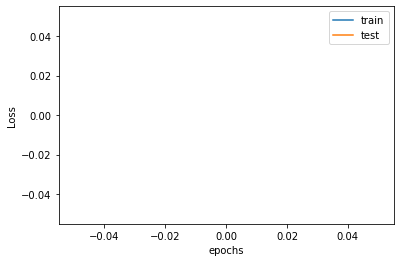

In [240]:
ax = plt.subplot(111)
epochs = range(0,epoch+1)
plt.plot(epochs,train_loss,label = 'train')
plt.plot(epochs,test_loss,label = 'test')
ax.set_xlabel('epochs')
ax.set_ylabel('Loss')
ax.legend()
print('测试集上最低loss：',min(test_loss).item())

测试集上最高Accuracy： nan
迭代次数 0


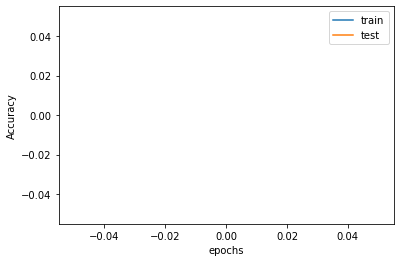

In [241]:
ax = plt.subplot(111)
plt.plot(epochs,train_acc,label = 'train')
plt.plot(epochs,test_acc,label = 'test')
ax.set_xlabel('epochs')
ax.set_ylabel('Accuracy')
ax.legend()
print('测试集上最高Accuracy：',max(test_acc))
print('迭代次数',test_acc.index(max(test_acc)))

In [242]:
print('测试集上最低loss：',min(test_loss).item())
print('测试集上最高Accuracy：',max(test_acc))

测试集上最低loss： nan
测试集上最高Accuracy： nan


# 实验记录

In [35]:
'''---------------------------------------实验记录---------------------------------------'''
'''
分析：Acc由Mape和Accuracy0.05构成，权重2：8；Mape训练结果较好，但Accuracy0.05较差
      将训练集和测试集比例由5：5修改为7：3后精确度略微提高至0.15
      

'''
model_shape = ['[140,1]', '[140,100,1]','[140,200,1]','[140,70,1]','[140,bn,140,1]',
               '[140,relu,bn,140,1]','[140,70,35,1]','[140,relu,70,relu,35,1]','[140,tanh,70,tanh,35,1]','[140,tanh,70,tanh,35,tanh,18,1]',
              '[140,tanh,140,tanh,140,tanh,140,1]']
min_loss = [160.44,155.92, 156.386,155.6147003173828,258.1241149902344,258.11346435546875,153.3505096435547,146.3516387939453,
            154.03189086914062,154.941650390625,139.44175720214844]
max_acc = [0.1027,0.106, 0.1058,0.10586858280918615,0.002745640095851446,0.00014085663480176863,0.1105658939157273,0.11389207184646019,
           0.1296424255402706,0.12876270836374984,0.12767572414928516]
log_df = pd.DataFrame(columns=['模型','最小损失值','最大精确度'])
log_df['模型'] = model_shape
log_df['最小损失值'] = min_loss
log_df['最大精确度'] = max_acc
log_df

,模型,最小损失值,最大精确度
0,"[140,1]",160.440000,0.102700
1,"[140,100,1]",155.920000,0.106000
2,"[140,200,1]",156.386000,0.105800
3,"[140,70,1]",155.614700,0.105869
4,"[140,bn,140,1]",258.124115,0.002746
5,"[140,relu,bn,140,1]",258.113464,0.000141
6,"[140,70,35,1]",153.350510,0.110566
7,"[140,relu,70,relu,35,1]",146.351639,0.113892
8,"[140,tanh,70,tanh,35,1]",154.031891,0.129642
9,"[140,tanh,70,tanh,35,tanh,18,1]",154.941650,0.128763


In [244]:
column = ['carid','tradetime','brand','serial','model','mileage','color','cityid','carcode','transfercount','seatings','registerdate','licensedate','country','maketype','modelyear','displacement','gearbox','oiltype','newprice','anony1','anony2','anony3','anony4','anony5','anony6','anony7','anony8','anony9','anony10','anony11','anony12','anony13','anony14','price']
df2 =  pd.read_excel("次次洗数据集.xlsx")
del df2['Unnamed: 0']
del df2['carid']
len(column)
df2

,tradetime,brand,serial,model,mileage,color,cityid,carcode,transfercount,seatings,...,anony6,anony7,anony8,anony9,anony10,anony11,anony12,anony13,anony14,price
0,7843,1,1,1,4.01,1,1,1,0,5,...,1,5866.20448,1.0,5.0,2.0,0.0,11.932050,6445.0,1,4.24
1,7840,2,2,2,8.60,1,2,1,0,5,...,2,5984.50712,2.0,4.0,3.0,1.0,12.163010,6080.0,2,7.38
2,7834,5,5,5,15.56,1,2,3,0,5,...,2,5740.00000,NaN,NaN,NaN,NaN,11.254202,3040.0,2,1.00
3,7844,6,6,6,6.04,1,3,1,3,5,...,1,6798.00000,2.0,5.0,2.0,0.0,14.087871,6050.0,2,4.38
4,7845,7,7,7,5.70,4,1,2,2,5,...,1,7560.00000,1.0,5.0,2.0,0.0,12.355994,4470.0,1,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29238,7656,11,186,12734,3.12,1,7,1,0,5,...,2,6231.30200,2.0,4.0,2.0,1.0,11.355487,6475.0,1,14.30
29239,7840,11,186,12734,6.23,1,1,1,1,5,...,2,7837.00000,2.0,4.0,2.0,1.0,11.355487,6475.0,1,12.80
29240,7496,11,186,12734,3.57,3,1,1,0,5,...,2,6254.51992,2.0,4.0,2.0,1.0,11.355487,6475.0,1,14.98
29241,7828,11,186,12734,3.62,1,3,1,2,5,...,2,7764.00000,2.0,4.0,2.0,1.0,11.355487,6475.0,1,15.80


In [245]:
# 连续变量，归一化： brand、cityid改为离散
continuation = [ 'tradetime', 'serial', 'model', 'mileage', 'registerdate', 'licensedate', 'modelyear',
                'displacement', 'gearbox', 'newprice', 'anony4','anony5','anony7','anony12','anony13']
print(len(continuation))
# 离散变量，转one-hot编码：
scatter = ['brand','cityid','color', 'carcode', 'transfercount', 'seatings', 'country', 'maketype', 'oiltype', 
           'anony1', 'anony2','anony3','anony6','anony8','anony9','anony10','anony11','anony14']

# print(sum(scatter_num))
# 归一化
def norm2(cls):
    df2[cls] = df2[cls].apply(lambda x: (x - df2[cls].min())/ ( df2[cls].max()-df2[cls].min() )  )
    return cls + '类归一化完成'
for cls in continuation:
    norm2(cls)
    print(cls + '类归一化完成')
# one-hot编码


15
tradetime类归一化完成
serial类归一化完成
model类归一化完成
mileage类归一化完成
registerdate类归一化完成
licensedate类归一化完成
modelyear类归一化完成
displacement类归一化完成
gearbox类归一化完成
newprice类归一化完成
anony4类归一化完成
anony5类归一化完成
anony7类归一化完成
anony12类归一化完成
anony13类归一化完成


In [246]:
del df2['anony4']
del df2['anony7']

In [247]:
brand = np.array(pd.get_dummies(df2['brand']))
cityid = np.array(pd.get_dummies(df2['cityid']))
color = np.array(pd.get_dummies(df2['color']))
carcode = np.array(pd.get_dummies(df2['carcode']))
transfercount = np.array(pd.get_dummies(df2['transfercount']))
seatings = np.array(pd.get_dummies(df2['seatings']))
country = np.array(pd.get_dummies(df2['country']))
maketype = np.array(pd.get_dummies(df2['maketype']))
oiltype = np.array(pd.get_dummies(df2['oiltype']))
anony1 = np.array(pd.get_dummies(df2['anony1']))
anony2 = np.array(pd.get_dummies(df2['anony2']))
anony3 = np.array(pd.get_dummies(df2['anony3']))
anony6 = np.array(pd.get_dummies(df2['anony6']))
anony8 = np.array(pd.get_dummies(df2['anony8']))
anony9 = np.array(pd.get_dummies(df2['anony9']))
anony10 = np.array(pd.get_dummies(df2['anony10']))
anony11 = np.array(pd.get_dummies(df2['anony11']))
anony14 = np.array(pd.get_dummies(df2['anony14']))

In [248]:
scatter_sum = []
for cls in scatter:
    scatter_sum.append(eval(cls).shape[1])
print(scatter_sum)
print('one-hot个数',sum(scatter_sum))
print('连续类个数',len(continuation))

[118, 88, 10, 5, 11, 7, 11, 3, 5, 2, 18, 8, 13, 6, 5, 2, 4, 3]
one-hot个数 319
连续类个数 15


In [249]:
for cls in scatter:
    del df2[cls]
del df2['price']

In [250]:
df2

,tradetime,serial,model,mileage,registerdate,licensedate,modelyear,displacement,gearbox,newprice,anony5,anony12,anony13
0,0.942609,0.000000,0.000000,0.089425,0.800479,0.789208,0.796042,0.147826,0.000,0.016335,0.000000,0.214652,0.753903
1,0.937391,0.000802,0.000079,0.192041,0.742219,0.737099,0.796042,0.095652,0.025,0.036170,0.005682,0.223674,0.686869
2,0.926957,0.003208,0.000314,0.347641,0.228252,0.180871,0.337138,0.165217,0.075,0.039281,0.022727,0.188175,0.128558
3,0.944348,0.004010,0.000393,0.134809,0.723065,0.703984,0.745053,0.113043,0.025,0.026486,0.028409,0.298860,0.681359
4,0.946087,0.004812,0.000471,0.127208,0.490024,0.456715,0.541095,0.234783,0.100,0.059894,0.034091,0.231212,0.391185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29238,0.617391,0.148356,1.000000,0.069528,0.795690,0.778954,0.847032,0.130435,0.750,0.075062,0.062500,0.192131,0.759412
29239,0.937391,0.148356,1.000000,0.139057,0.790902,0.782148,0.847032,0.130435,0.375,0.075062,0.062500,0.192131,0.759412
29240,0.339130,0.148356,1.000000,0.079589,0.806065,0.836107,0.847032,0.130435,0.750,0.075062,0.062500,0.192131,0.759412
29241,0.916522,0.148356,1.000000,0.080706,0.830008,0.825349,0.847032,0.130435,0.375,0.075062,0.062500,0.192131,0.759412


In [251]:
data = np.array(df2)
data.shape

(29243, 13)

In [252]:
for cls in scatter:
    data = np.concatenate((data,eval(cls)),axis=1)

In [253]:
databackup = data
databackup.shape

(29243, 332)

In [254]:
data = databackup
# data = np.delete(data,(0,1,2,7,8,10,11,13),axis = 1)
print(data.shape)
# 指定其中70％数据为训练集 30％为测试集
data = torch.Tensor(data)
num_of_train = int(data.shape[0]*0.6)
num_of_test = int(data.shape[0] - num_of_train)
print(num_of_train,num_of_test)
train_x = data[:num_of_train,]
test_x = data[:num_of_test,]
column = ['carid','tradetime','brand','serial','model','mileage','color','cityid','carcode','transfercount','seatings','registerdate','licensedate','country','maketype','modelyear','displacement','gearbox','oiltype','newprice','anony1','anony2','anony3','anony4','anony5','anony6','anony7','anony8','anony9','anony10','anony11','anony12','anony13','anony14','price']
df2 =  pd.read_excel("次次洗数据集.xlsx")
price = torch.Tensor(df2['price']).reshape(len(df2),1)
train_y = price[:num_of_train]
test_y = price[num_of_train:]
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(29243, 332)
17545 11698
torch.Size([17545, 332])
torch.Size([11698, 332])
torch.Size([17545, 1])
torch.Size([11698, 1])


In [255]:
import torch
from torch.nn import Module
# 是否使用GPU训练 
GPU = torch.cuda.is_available()
if GPU:
    train_x = train_x.cuda()
    test_x = test_x.cuda()
    train_y = train_y.cuda()
    test_y = test_y.cuda()
class Unlinear(Module):

    def __init__(self):
        para = [train_x.shape[1],140,80,1]
        super(Unlinear, self).__init__()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.dropout = torch.nn.Dropout(p=0.5)
        self.linear1 = torch.nn.Linear(para[0], para[1],bias=True)
        self.linear2 = torch.nn.Linear(para[1], para[2],bias=True)
        self.linear3 = torch.nn.Linear(para[2], para[3],bias=True)
        self.bn1 = torch.nn.BatchNorm1d(para[1])
        self.bn2 = torch.nn.BatchNorm1d(para[2])
#         self.linear4 = torch.nn.Linear(para[3], para[4],bias=True)
#         self.linear5 = torch.nn.Linear(para[4], para[5],bias=True)    
    def forward(self, x):
        y = self.linear1(x)
        y = self.dropout(y)
        y = self.tanh(y)
#         y = self.tanh(y)
#         y = self.bn1(y)
        y = self.linear2(y)
        y = self.dropout(y)
        y = self.tanh(y)
#         y = self.tanh(y)
        y = self.linear3(y)
#         y = self.tanh(y)
#         y = self.linear4(y)
        return y
    
Model = Unlinear()
if GPU:
    Model.cuda()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(Model.parameters(),lr=0.001)
train_loss = []
test_loss = []
train_acc = []
test_acc = []
epoch = 1000
for epoch in range(epoch): 
    #训练集
    train_pred_y = Model(train_x) # train_x训练集输入 train_y训练集输出；
    trainloss = criterion(train_y, train_pred_y)
    train_loss.append(trainloss)

    with torch.no_grad():
        if GPU == True:
            y = train_y.cpu()
            y_p = train_pred_y.cpu()
            train_acc.append(accurate(y,y_p))
        else:
            train_acc.append(accurate(train_y,train_pred_y))
        
    print('epoch:',epoch, 'train_loss:',trainloss)    
    #梯度更新
    optimizer.zero_grad()
    trainloss.backward()
    optimizer.step()
    # 测试集
    with torch.no_grad():
        test_pred_y = Model(test_x)
        testloss = criterion(test_y, test_pred_y)
        test_loss.append(testloss)  
        
        if GPU == True:
            y_t = test_y.cpu()
            y_t_p = test_pred_y.cpu()
            test_acc.append(accurate(y_t,y_t_p))
        else:
            test_acc.append(accurate(test_y,test_pred_y))
            
        print('epoch:',epoch, 'test_loss:',testloss) 
    




epoch: 0 train_loss: tensor(256.5794, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 0 test_loss: tensor(239.8351, device='cuda:0')
epoch: 1 train_loss: tensor(253.4126, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 1 test_loss: tensor(236.8084, device='cuda:0')
epoch: 2 train_loss: tensor(250.2670, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 2 test_loss: tensor(233.8160, device='cuda:0')
epoch: 3 train_loss: tensor(247.1548, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 3 test_loss: tensor(230.7190, device='cuda:0')
epoch: 4 train_loss: tensor(243.9366, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 4 test_loss: tensor(227.5251, device='cuda:0')
epoch: 5 train_loss: tensor(240.7158, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 5 test_loss: tensor(224.1570, device='cuda:0')
epoch: 6 train_loss: tensor(237.4012, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 6 test_loss: tensor(220.8725, device='cuda:0')
epoch: 7 train_loss: tensor(233.8326, device='cu

epoch: 59 test_loss: tensor(146.5672, device='cuda:0')
epoch: 60 train_loss: tensor(157.6127, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 60 test_loss: tensor(145.8170, device='cuda:0')
epoch: 61 train_loss: tensor(157.0175, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 61 test_loss: tensor(144.8706, device='cuda:0')
epoch: 62 train_loss: tensor(156.1834, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 62 test_loss: tensor(144.4054, device='cuda:0')
epoch: 63 train_loss: tensor(155.5684, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 63 test_loss: tensor(143.8623, device='cuda:0')
epoch: 64 train_loss: tensor(154.9789, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 64 test_loss: tensor(142.8763, device='cuda:0')
epoch: 65 train_loss: tensor(154.2422, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 65 test_loss: tensor(142.3291, device='cuda:0')
epoch: 66 train_loss: tensor(153.4018, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 66 test_loss: tensor(141.76

epoch: 123 test_loss: tensor(113.7494, device='cuda:0')
epoch: 124 train_loss: tensor(123.6059, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 124 test_loss: tensor(113.5957, device='cuda:0')
epoch: 125 train_loss: tensor(123.4039, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 125 test_loss: tensor(113.3303, device='cuda:0')
epoch: 126 train_loss: tensor(123.0523, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 126 test_loss: tensor(113.2362, device='cuda:0')
epoch: 127 train_loss: tensor(122.2943, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 127 test_loss: tensor(112.6015, device='cuda:0')
epoch: 128 train_loss: tensor(122.2006, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 128 test_loss: tensor(112.1084, device='cuda:0')
epoch: 129 train_loss: tensor(121.7131, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 129 test_loss: tensor(111.7717, device='cuda:0')
epoch: 130 train_loss: tensor(121.3682, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 130 test_loss

epoch: 182 test_loss: tensor(97.5576, device='cuda:0')
epoch: 183 train_loss: tensor(106.7595, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 183 test_loss: tensor(97.5414, device='cuda:0')
epoch: 184 train_loss: tensor(106.5172, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 184 test_loss: tensor(97.3303, device='cuda:0')
epoch: 185 train_loss: tensor(106.4390, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 185 test_loss: tensor(97.1969, device='cuda:0')
epoch: 186 train_loss: tensor(106.0786, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 186 test_loss: tensor(97.2362, device='cuda:0')
epoch: 187 train_loss: tensor(105.7040, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 187 test_loss: tensor(96.4934, device='cuda:0')
epoch: 188 train_loss: tensor(105.6984, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 188 test_loss: tensor(96.7805, device='cuda:0')
epoch: 189 train_loss: tensor(105.4249, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 189 test_loss: tenso

epoch: 242 test_loss: tensor(89.4394, device='cuda:0')
epoch: 243 train_loss: tensor(97.4562, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 243 test_loss: tensor(89.4309, device='cuda:0')
epoch: 244 train_loss: tensor(97.7370, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 244 test_loss: tensor(89.3078, device='cuda:0')
epoch: 245 train_loss: tensor(97.4794, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 245 test_loss: tensor(89.2332, device='cuda:0')
epoch: 246 train_loss: tensor(97.4943, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 246 test_loss: tensor(89.3487, device='cuda:0')
epoch: 247 train_loss: tensor(97.2538, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 247 test_loss: tensor(89.1898, device='cuda:0')
epoch: 248 train_loss: tensor(97.0513, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 248 test_loss: tensor(89.0100, device='cuda:0')
epoch: 249 train_loss: tensor(97.2057, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 249 test_loss: tensor(89.02

epoch: 306 test_loss: tensor(85.7481, device='cuda:0')
epoch: 307 train_loss: tensor(93.0626, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 307 test_loss: tensor(85.7048, device='cuda:0')
epoch: 308 train_loss: tensor(92.8575, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 308 test_loss: tensor(85.3949, device='cuda:0')
epoch: 309 train_loss: tensor(92.9186, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 309 test_loss: tensor(85.4782, device='cuda:0')
epoch: 310 train_loss: tensor(93.1630, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 310 test_loss: tensor(85.5703, device='cuda:0')
epoch: 311 train_loss: tensor(92.8646, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 311 test_loss: tensor(85.4275, device='cuda:0')
epoch: 312 train_loss: tensor(92.7332, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 312 test_loss: tensor(85.1730, device='cuda:0')
epoch: 313 train_loss: tensor(92.4547, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 313 test_loss: tensor(85.76

epoch: 370 test_loss: tensor(83.9407, device='cuda:0')
epoch: 371 train_loss: tensor(91.3316, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 371 test_loss: tensor(84.1148, device='cuda:0')
epoch: 372 train_loss: tensor(91.4654, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 372 test_loss: tensor(84.3944, device='cuda:0')
epoch: 373 train_loss: tensor(91.2980, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 373 test_loss: tensor(84.3820, device='cuda:0')
epoch: 374 train_loss: tensor(91.2357, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 374 test_loss: tensor(84.5120, device='cuda:0')
epoch: 375 train_loss: tensor(91.5169, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 375 test_loss: tensor(84.2505, device='cuda:0')
epoch: 376 train_loss: tensor(91.1437, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 376 test_loss: tensor(84.6654, device='cuda:0')
epoch: 377 train_loss: tensor(91.3023, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 377 test_loss: tensor(84.51

epoch: 434 test_loss: tensor(90.3581, device='cuda:0')
epoch: 435 train_loss: tensor(82.6311, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 435 test_loss: tensor(93.4420, device='cuda:0')
epoch: 436 train_loss: tensor(80.2319, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 436 test_loss: tensor(98.7392, device='cuda:0')
epoch: 437 train_loss: tensor(78.4299, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 437 test_loss: tensor(105.2420, device='cuda:0')
epoch: 438 train_loss: tensor(77.7833, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 438 test_loss: tensor(112.2584, device='cuda:0')
epoch: 439 train_loss: tensor(77.9003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 439 test_loss: tensor(116.9672, device='cuda:0')
epoch: 440 train_loss: tensor(78.3696, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 440 test_loss: tensor(117.1019, device='cuda:0')
epoch: 441 train_loss: tensor(77.4118, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 441 test_loss: tensor(1

epoch: 498 test_loss: tensor(108.9134, device='cuda:0')
epoch: 499 train_loss: tensor(58.1384, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 499 test_loss: tensor(109.2583, device='cuda:0')
epoch: 500 train_loss: tensor(58.2392, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 500 test_loss: tensor(109.0789, device='cuda:0')
epoch: 501 train_loss: tensor(58.1069, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 501 test_loss: tensor(109.2445, device='cuda:0')
epoch: 502 train_loss: tensor(57.5805, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 502 test_loss: tensor(109.0690, device='cuda:0')
epoch: 503 train_loss: tensor(57.7795, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 503 test_loss: tensor(109.8370, device='cuda:0')
epoch: 504 train_loss: tensor(57.3859, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 504 test_loss: tensor(109.5089, device='cuda:0')
epoch: 505 train_loss: tensor(57.3052, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 505 test_loss: tenso

epoch: 562 test_loss: tensor(112.5038, device='cuda:0')
epoch: 563 train_loss: tensor(48.3741, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 563 test_loss: tensor(112.8529, device='cuda:0')
epoch: 564 train_loss: tensor(48.6988, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 564 test_loss: tensor(112.5119, device='cuda:0')
epoch: 565 train_loss: tensor(48.5043, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 565 test_loss: tensor(112.8771, device='cuda:0')
epoch: 566 train_loss: tensor(47.8322, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 566 test_loss: tensor(112.7534, device='cuda:0')
epoch: 567 train_loss: tensor(47.9503, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 567 test_loss: tensor(112.2130, device='cuda:0')
epoch: 568 train_loss: tensor(47.9771, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 568 test_loss: tensor(113.5840, device='cuda:0')
epoch: 569 train_loss: tensor(48.1609, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 569 test_loss: tenso

epoch: 626 train_loss: tensor(42.0535, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 626 test_loss: tensor(116.8258, device='cuda:0')
epoch: 627 train_loss: tensor(41.8155, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 627 test_loss: tensor(116.1473, device='cuda:0')
epoch: 628 train_loss: tensor(41.7628, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 628 test_loss: tensor(116.5089, device='cuda:0')
epoch: 629 train_loss: tensor(42.0249, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 629 test_loss: tensor(116.5323, device='cuda:0')
epoch: 630 train_loss: tensor(41.3402, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 630 test_loss: tensor(116.6232, device='cuda:0')
epoch: 631 train_loss: tensor(41.5164, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 631 test_loss: tensor(116.5708, device='cuda:0')
epoch: 632 train_loss: tensor(41.1122, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 632 test_loss: tensor(117.4422, device='cuda:0')
epoch: 633 train_loss: tens

epoch: 690 train_loss: tensor(36.4825, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 690 test_loss: tensor(120.4432, device='cuda:0')
epoch: 691 train_loss: tensor(36.4046, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 691 test_loss: tensor(120.5690, device='cuda:0')
epoch: 692 train_loss: tensor(36.3597, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 692 test_loss: tensor(120.7679, device='cuda:0')
epoch: 693 train_loss: tensor(36.1512, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 693 test_loss: tensor(120.5597, device='cuda:0')
epoch: 694 train_loss: tensor(36.0470, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 694 test_loss: tensor(120.9736, device='cuda:0')
epoch: 695 train_loss: tensor(35.8041, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 695 test_loss: tensor(120.4155, device='cuda:0')
epoch: 696 train_loss: tensor(36.2318, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 696 test_loss: tensor(121.4465, device='cuda:0')
epoch: 697 train_loss: tens

epoch: 754 train_loss: tensor(33.0465, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 754 test_loss: tensor(124.8648, device='cuda:0')
epoch: 755 train_loss: tensor(32.5679, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 755 test_loss: tensor(124.4297, device='cuda:0')
epoch: 756 train_loss: tensor(32.2903, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 756 test_loss: tensor(123.9900, device='cuda:0')
epoch: 757 train_loss: tensor(32.2551, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 757 test_loss: tensor(124.4536, device='cuda:0')
epoch: 758 train_loss: tensor(32.4561, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 758 test_loss: tensor(125.2511, device='cuda:0')
epoch: 759 train_loss: tensor(32.3004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 759 test_loss: tensor(124.3890, device='cuda:0')
epoch: 760 train_loss: tensor(32.5612, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 760 test_loss: tensor(124.4041, device='cuda:0')
epoch: 761 train_loss: tens

epoch: 818 train_loss: tensor(29.7355, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 818 test_loss: tensor(127.6331, device='cuda:0')
epoch: 819 train_loss: tensor(29.6471, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 819 test_loss: tensor(128.4848, device='cuda:0')
epoch: 820 train_loss: tensor(29.3294, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 820 test_loss: tensor(128.4298, device='cuda:0')
epoch: 821 train_loss: tensor(29.2853, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 821 test_loss: tensor(128.0909, device='cuda:0')
epoch: 822 train_loss: tensor(29.3891, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 822 test_loss: tensor(127.5648, device='cuda:0')
epoch: 823 train_loss: tensor(29.6173, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 823 test_loss: tensor(128.5166, device='cuda:0')
epoch: 824 train_loss: tensor(29.3471, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 824 test_loss: tensor(128.2034, device='cuda:0')
epoch: 825 train_loss: tens

epoch: 882 train_loss: tensor(27.2238, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 882 test_loss: tensor(130.8250, device='cuda:0')
epoch: 883 train_loss: tensor(27.3488, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 883 test_loss: tensor(130.8992, device='cuda:0')
epoch: 884 train_loss: tensor(27.0525, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 884 test_loss: tensor(130.1028, device='cuda:0')
epoch: 885 train_loss: tensor(27.3532, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 885 test_loss: tensor(131.1269, device='cuda:0')
epoch: 886 train_loss: tensor(27.4435, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 886 test_loss: tensor(130.4805, device='cuda:0')
epoch: 887 train_loss: tensor(27.3572, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 887 test_loss: tensor(130.7748, device='cuda:0')
epoch: 888 train_loss: tensor(27.0475, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 888 test_loss: tensor(131.3936, device='cuda:0')
epoch: 889 train_loss: tens

epoch: 941 train_loss: tensor(25.7751, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 941 test_loss: tensor(133.2153, device='cuda:0')
epoch: 942 train_loss: tensor(25.6214, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 942 test_loss: tensor(132.8993, device='cuda:0')
epoch: 943 train_loss: tensor(25.6077, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 943 test_loss: tensor(133.5320, device='cuda:0')
epoch: 944 train_loss: tensor(25.6233, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 944 test_loss: tensor(134.2152, device='cuda:0')
epoch: 945 train_loss: tensor(25.7324, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 945 test_loss: tensor(133.9894, device='cuda:0')
epoch: 946 train_loss: tensor(25.4748, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 946 test_loss: tensor(133.5421, device='cuda:0')
epoch: 947 train_loss: tensor(25.6299, device='cuda:0', grad_fn=<MseLossBackward>)
epoch: 947 test_loss: tensor(134.4502, device='cuda:0')
epoch: 948 train_loss: tens

测试集上最低loss： 83.4369125366211


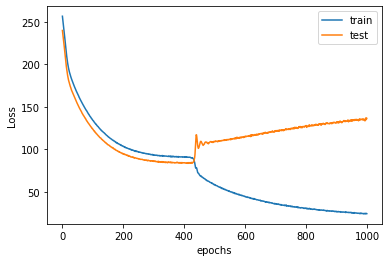

In [256]:
ax = plt.subplot(111)
epochs = range(0,epoch+1)
plt.plot(epochs,train_loss,label = 'train')
plt.plot(epochs,test_loss,label = 'test')
ax.set_xlabel('epochs')
ax.set_ylabel('Loss')
ax.legend()
print('测试集上最低loss：',min(test_loss).item())

测试集上最高Accuracy： 0.11173832256746286


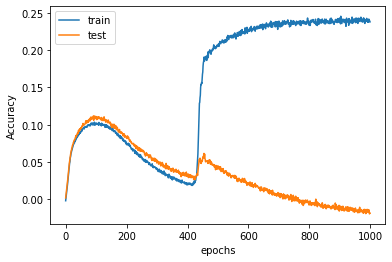

In [257]:
ax = plt.subplot(111)
plt.plot(epochs,train_acc,label = 'train')
plt.plot(epochs,test_acc,label = 'test')
ax.set_xlabel('epochs')
ax.set_ylabel('Accuracy')
ax.legend()
print('测试集上最高Accuracy：',max(test_acc))

In [258]:
'''
删除掉第i列   最高精确度
    0.10789409320656057
1    
    
'''

'\n删除掉第i列   最高精确度\n    0.10789409320656057\n1    \n    \n'

In [ ]:
column = ['carid','tradetime','brand','serial','model','mileage','color','cityid','carcode','transfercount','seatings','registerdate','licensedate','country','maketype','modelyear','displacement','gearbox','oiltype','newprice','anony1','anony2','anony3','anony4','anony5','anony6','anony7','anony8','anony9','anony10','anony11','anony12','anony13','anony14','anony15','price']
df1 =  pd.read_table("2021年MathorCup大数据竞赛赛道A/附件/附件2：估价验证数据.txt",header=None,names=column,index_col=False)

In [ ]:
df1['price'].isnull().sum()

In [ ]:
B = np.sum(B<2)
B